## Thông tin nhóm
|STT|Mã số sinh viên| Họ Tên|
|---|---|--|
|1| 20127162| Nguyễn Sơn Hòa|
|2| 20127393| Nguyễn Thúy Vy|
|3| 20127514| Trần Thị Bảo Hương|

## Tiến độ kỳ trước 

- Hòan thành cơ bản các lớp như Convolution, Maxpooling, Dense, Batch - normalize 

## Tiến độ hiện tại
- Hoàn thành phần cấu trúc RNN (mô hình LSTM)
- Tối ưu hóa các layer thành phần
- Đưa ra mô hình hoàn chỉnh

## Long Short Term Memory
Mô hình thực hiện của nhóm là Bidirection với phần core là kiến trúc LSTM. Để hiểm rõ LSTM hoạt động như nào sẽ xem kiến trúc sau


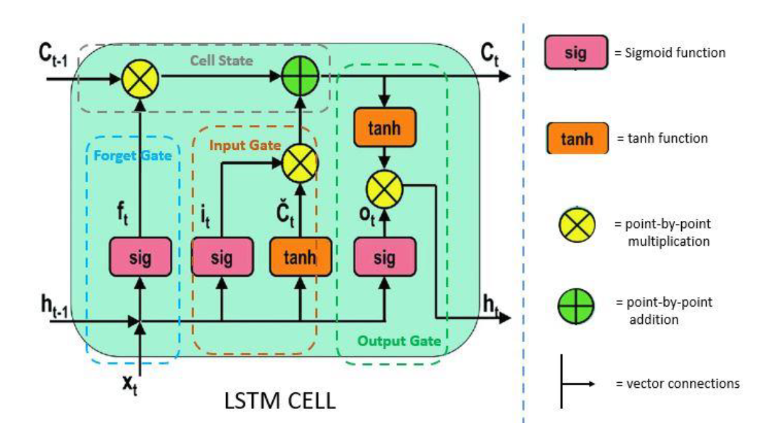

- Các kiến trúc RNN thực hiện cập nhật trọng số qua các timestep.
 
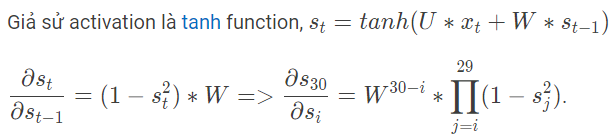

Như vậy với cách time step càng xa thì đạo hàm càng tiến về 0 => Hiện tượng *vanishing gradient*. Hay nói cách khác các hệ số không được update với các frame ở xa. Hay nói cách khác là RNN không học được từ các thông tin ở trước đó xa do vanishing gradient.
- Một ví dụ hình dung để dự đoán từ tiếp theo của câu "Tôi là người Việt Nam. Tôi đang sống ở nước ngoài. Tôi có thể nói trôi chảy tiếng …" Không thêm đoán được là chữ "Việt" Khi sử dung RNN vì hiện tượng gradient vashing là mất mát các thông tin ở xa. Để dự đoán được ta cần thông tin "Tôi là người Việt Nam", thông tin rất xa (long term memory). 
- Long short term memory (LSTM) được ra đời => giải quyết hiện tượng vashing gardient

### Mã giả
input each timestep: 
- weight and bias of state or gate
- x input, feature of t time 
- h_(t-1), value of hidden layer of (t-1) time 

Output each timestep:
- value correspond gate/state 

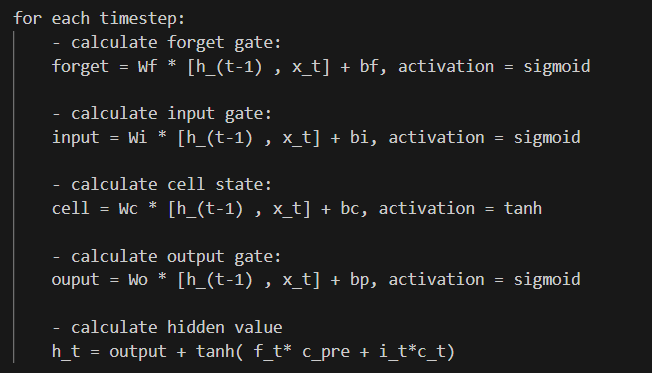


Chi tiết cài đặt LSTM trong file bidirectinal.py

## Optimize

Sử dung block 3d để tối ưu hóa quá trình tính toán.
- Phiên bản hiện tại: Sử dụng block 2D lấy chỉ sổ của hàng và cột để tính toán.

Thực thế trong quá trình song song hóa khi sử dụng 2D luôn tồn tại 1 vòng lặp tương ứu với kết quả của lớp đầu ra, Nhận thấy giá trị cách lớp hoàn thành độc lặp nên thực hiện tiến hành.
- Thiết kế: Block có số chiều là 3 tương ứng vs 3 giá trị số layer, số dòng, cột. Lúc này mỗi thread có trách nhiệm tính toán giá trị duy nhất của 1 output. Khác biệt só với phiên bản trước là mỗi thread thực hiện tính toàn output tại dong r, cột c của  mỗi layer output.



Cách tối ưu hóa 3D hoạt động:

Threading trong ba chiều:

* Kích thước grid: grid được định nghĩa trong ba chiều (x, y, z). Điều này cho phép phân phối công việc linh hoạt và hiệu quả hơn trên các ma trận input và weight.
* Kích thước block: Mỗi clock trong grid cũng có thể được định nghĩa trong ba chiều. Cấu trúc phân cấp này của các luồng giúp quản lý sự song song ở quy mô lớn hiệu quả hơn.

Song song hóa:

  * Bằng cách sử dụng Grid 3D, quá trình tính toán được song song hóa trên ba chiều, cho phép mỗi luồng xử lý một phần nhỏ của toàn bộ tính toán. Điều này dẫn đến giảm đáng kể thời gian tính toán so với phương pháp đơn luồng.

Truy cập bộ nhớ hiệu quả:

* Mỗi luồng chỉ truy cập một phần nhỏ của các mảng input, weight và bias. Mô hình truy cập cục bộ này giúp sử dụng hiệu quả băng thông bộ nhớ của GPU và giảm thiểu chi phí truy cập bộ nhớ.


Load Balancing:

* Cấu hình Grid và Block 3D cho phép load balancing tốt hơn trên GPU. Điều này đảm bảo rằng tất cả các luồng được sử dụng hiệu quả, dẫn đến cải thiện hiệu suất tổng thể.